<a href="https://colab.research.google.com/github/aaron-norman/bug-test/blob/main/Daylight_savings_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Starting Daylight Savings Time



CLOCKS MOVING FORWARD

Here, we deal with day-light savings, where the clock pushes forward in the summer to accomodate a longer day.

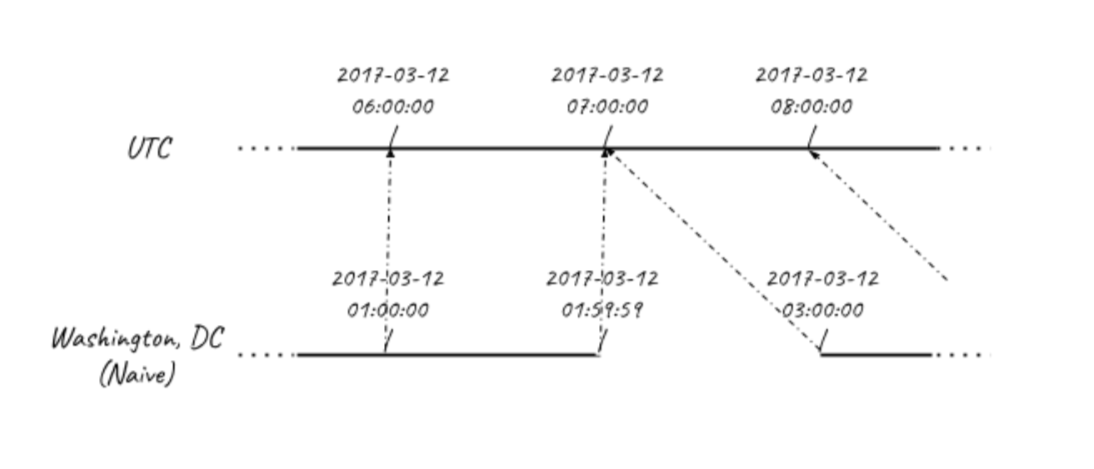

In [2]:
# create a dt for the moment before the one-hour jump:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [3]:
# next, we create the 3am
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am

datetime.datetime(2017, 3, 12, 3, 0)

As we expected, we get an hour and one second difference. Datetime is naive by default of daylight savings time.

In [4]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

To accomodate daylight savings time, you need to use TZ offsets

In [5]:
from datetime import timezone, timedelta
EST = timezone(timedelta(hours = -5))
EDT = timezone(timedelta(hours = -4))

In [7]:
# replace the exising "spring_ahead_159am" to include tz info
spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59-05:00'

In [9]:
# We do the same with the spring_ahead_3am, but this time replace with tzinfo=EDT
spring_ahead_3am = spring_ahead_3am.replace(tzinfo=EDT)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00-04:00'

Including proper timezones, allows for proper comparisons with datetime objects.

In [10]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

# How to find the cutoff, though?

```
from dateutil import tz
eastern = tz.gettz("Armerica/New_York")
```

In [18]:
from dateutil import tz
eastern = tz.gettz('America/New_York')

Let `tz.gettz("America/New_York")` determine when you're in EDT or EST

In [19]:
spring_standard = datetime(2024, 3, 10, 1, 59, 59, tzinfo = eastern)
spring_daylight = datetime(2024, 3, 10, 3, 0, 0, tzinfo = eastern)

In [20]:
# Not working like he said....
(spring_daylight - spring_standard).total_seconds()

3601.0

## Workout:

Here we embed the tz data to the current date. When we add a timedelta to the 'start' variable, it moves into a new timezone, as shown by the print statement.

In [21]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00


In [22]:
# see legal time difference:
# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

6.0


In [23]:
# to see absolute time that passed:
# replace with UTC:

utc = timezone.utc
start = start.astimezone(utc)
end = end.astimezone(utc)

print(f"total hours passed: {(end-start).total_seconds()/(60*60)}")

total hours passed: 5.0


# Use `dateutil.tz` to find changes



In [24]:
from datetime import datetime
from dateutil import tz

dt = datetime(2000, 3, 29, tzinfo = tz.gettz("Europe/London"))

dt.isoformat()

'2000-03-29T00:00:00+01:00'

In [25]:
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [36]:
utcx = timezone.utc
start=start.astimezone(tz.gettz('America/New_York'))
end=end.astimezone(tz.gettz('America/New_York'))

dt = datetime(2017, 3, 12, 3, 24, tzinfo = tz.gettz("America/New_York"))

for y in range(2017, 2025):
  print(dt.replace(year=y).isoformat())

2017-03-12T03:24:00-04:00
2018-03-12T03:24:00-04:00
2019-03-12T03:24:00-04:00
2020-03-12T03:24:00-04:00
2021-03-12T03:24:00-05:00
2022-03-12T03:24:00-05:00
2023-03-12T03:24:00-04:00
2024-03-12T03:24:00-04:00


# End daylight savings time

How to deal with ambiguity around daylight savings and when the clock jumps forward.

`tz.datetime_ambiguous(dt_value)` will confirm if the datetime value passed in is on the border with a change in offset.

`tz.enfold(dt_value)` - helps to distinguish between the first instance (before the transition) and the second instance (after the transition) of such ambiguous time by marking the datetime with an `enfold` attribute.

The problem is that it doesn't express the difference in times. k


In [37]:
eastern = tz.gettz('US/Eastern')

# 2017/11/05 - 01:00:00
first_1 = datetime(2017, 11, 5, 1, 0, 0,
                   tzinfo = eastern)

In [38]:
tz.datetime_ambiguous(first_1)

True

In [39]:
second_1 = datetime(2017, 11, 5, 1, 0, 0,
                    tzinfo = eastern)
second_1 = tz.enfold(second_1)

In [40]:
(first_1 - second_1).total_seconds()

0.0

To remove the ambiguity, you need to convert the times to UTC.

In [42]:
(first_1 - second_1).total_seconds()

0.0

In [45]:
# CONVERSION TO UTC
first_1 = first_1.astimezone(tz.UTC)
second_1 = second_1.astimezone(tz.UTC)

In [46]:
(second_1 - first_1).total_seconds()

3600.0

# Workout

at the end of lesson 2, we saw something anomalous in our bike trip duration data. Let's see if we can identify what the problem might be.

The data is loaded as `onebike_datetimes` and `tz` is imported from dateutil.

1. Loop over the trips in `onebike_datetimes`:
- print any rides whose start is ambiguous.
- print any rides whose end is ambiguous.

In [52]:
for trip in onebike_data:
  # rides with ambiguous start:
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous Start at:", str(trip['start']))
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous END at:", str(trip['end']))

Ambiguous Start at: 2017-11-05 01:56:50-04:00
Ambiguous END at: 2017-11-05 01:01:04-04:00


# Cleaning daylight saving data with fold

As we've just discovered, there is a ride in our dataset which is being messed up by a Daylight savings' shift. Let's clean up the dataset so that we actually have correct minimum ride length. We can use the fact that we know the end of the ride happened after the befinning to fiz up the duration messed up by the shift out of Daylight Savings.

Since Python does not handle `tz.enfold()` when doing arithmetic, we must put our datetime objects into UTC, where ambiguities have been resolved.

`onebike_data` is in the bottom of this notebook as a list of dictionaries. Make sure you have tz and timezone imported. Use `tz.UTC` for the timezone.

In [63]:
trip_durations = []
for trip in onebike_data:
  # when the start is later than the end, set the fold to be 1.
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # convert to utc
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

print("Shortest trip:", str(min(trip_durations)))

Shortest trip: 116.0


In [62]:
onebike_data

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 6, 37, 10, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 2, 6, 42, 53, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 8, 56, 45, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 2, 9, 18, 3, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 18, 23, 48, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.d

In [50]:
# Data


In [49]:
# @title
onebike_data = [{'start':  datetime(2017, 10, 1, 15, 23, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 1, 15, 26, 26, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 1, 15, 42, 57, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 1, 17, 49, 59, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 6, 37, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 6, 42, 53, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 8, 56, 45, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 9, 18, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 18, 23, 48, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 18, 45, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 18, 48, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 19, 10, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 19, 18, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 19, 31, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 2, 19, 37, 32, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 2, 19, 46, 37, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 3, 8, 24, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 3, 8, 32, 27, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 3, 18, 17, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 3, 18, 27, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 3, 19, 24, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 3, 19, 52, 8, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 3, 20, 17, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 3, 20, 23, 52, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 3, 20, 45, 21, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 3, 20, 57, 10, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 7, 4, 57, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 7, 13, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 7, 13, 42, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 7, 21, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 14, 22, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 14, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 15, 7, 27, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 15, 44, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 15, 46, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 16, 32, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 16, 34, 44, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 16, 46, 59, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 17, 26, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 17, 31, 36, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 4, 17, 42, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 4, 17, 50, 41, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 5, 7, 49, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 5, 8, 12, 55, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 5, 8, 26, 21, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 5, 8, 29, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 5, 8, 33, 27, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 5, 8, 38, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 5, 16, 35, 35, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 5, 16, 51, 52, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 5, 17, 53, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 5, 18, 16, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 8, 17, 17, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 8, 38, 1, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 11, 39, 40, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 11, 50, 38, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 12, 59, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 13, 13, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 13, 43, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 14, 14, 56, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 14, 28, 15, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 15, 9, 26, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 15, 50, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 16, 12, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 16, 32, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 16, 39, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 16, 44, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 16, 48, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 6, 16, 53, 43, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 6, 17, 9, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 7, 11, 38, 55, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 7, 11, 53, 6, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 7, 14, 3, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 7, 14, 7, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 7, 14, 20, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 7, 14, 27, 36, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 7, 14, 30, 50, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 7, 14, 44, 51, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 0, 28, 26, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 0, 30, 48, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 11, 16, 21, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 11, 33, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 12, 37, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 13, 1, 29, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 13, 30, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 13, 57, 53, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 14, 16, 40, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 15, 7, 19, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 15, 23, 50, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 15, 50, 1, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 15, 54, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 16, 17, 42, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 16, 28, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 16, 35, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 23, 8, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 23, 33, 41, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 23, 34, 49, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 8, 23, 45, 11, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 8, 23, 46, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 0, 10, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 0, 12, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 0, 36, 40, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 0, 37, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 0, 53, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 1, 23, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 1, 48, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 1, 49, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 2, 13, 35, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 2, 14, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 2, 29, 40, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 13, 4, 32, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 13, 13, 25, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 14, 30, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 14, 38, 55, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 15, 6, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 15, 11, 30, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 9, 16, 43, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 9, 16, 45, 38, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 15, 32, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 15, 51, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 16, 47, 55, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 17, 3, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 17, 51, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 18, 0, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 18, 8, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 18, 19, 11, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 19, 9, 35, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 19, 14, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 19, 17, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 19, 23, 8, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 19, 28, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 19, 44, 40, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 19, 55, 35, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 20, 11, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 10, 22, 20, 43, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 10, 22, 33, 23, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 11, 4, 40, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 11, 4, 59, 22, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 11, 6, 28, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 11, 6, 40, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 11, 16, 41, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 11, 17, 1, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 8, 8, 30, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 8, 35, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 8, 47, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 8, 59, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 13, 13, 39, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 13, 37, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 13, 40, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 13, 48, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 13, 49, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 13, 53, 16, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 12, 14, 33, 18, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 12, 14, 39, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 13, 15, 55, 39, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 13, 15, 59, 41, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 17, 17, 58, 48, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 17, 18, 1, 38, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 19, 20, 21, 45, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 19, 20, 29, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 19, 21, 11, 39, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 19, 21, 29, 37, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 19, 21, 30, 1, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 19, 21, 47, 23, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 19, 21, 47, 34, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 19, 21, 57, 7, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 19, 21, 57, 24, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 19, 22, 9, 52, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 21, 12, 24, 9, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 21, 12, 36, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 21, 12, 36, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 21, 12, 42, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 21, 13, 47, 43, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 11, 9, 36, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 13, 28, 53, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 13, 31, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 13, 47, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 13, 56, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 14, 26, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 14, 32, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 14, 54, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 15, 9, 58, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 16, 40, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 16, 51, 40, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 17, 58, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 18, 28, 37, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 18, 45, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 18, 50, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 22, 18, 56, 22, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 22, 19, 11, 10, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 10, 14, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 10, 35, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 11, 29, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 14, 38, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 15, 4, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 15, 32, 58, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 15, 33, 48, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 17, 6, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 17, 13, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 19, 31, 26, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 19, 55, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 20, 25, 53, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 21, 47, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 22, 18, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 23, 22, 34, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 23, 22, 48, 42, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 24, 6, 55, 1, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 24, 7, 2, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 24, 14, 56, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 24, 15, 3, 16, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 24, 15, 51, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 24, 15, 59, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 24, 16, 31, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 24, 16, 55, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 10, 28, 14, 26, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 10, 28, 14, 32, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 1, 9, 41, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 1, 9, 52, 23, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 1, 20, 16, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 1, 20, 32, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 2, 19, 44, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 2, 19, 50, 56, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 2, 20, 14, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 2, 20, 30, 29, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 2, 21, 35, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 2, 21, 38, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 9, 59, 27, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 10, 11, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 10, 13, 22, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 10, 32, 2, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 10, 44, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 10, 50, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 16, 6, 43, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 16, 44, 38, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 16, 45, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 17, 0, 27, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 17, 7, 15, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 17, 35, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 17, 36, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 17, 46, 48, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 17, 50, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 18, 0, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 3, 19, 22, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 3, 19, 45, 51, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 13, 14, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 13, 26, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 14, 18, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 14, 30, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 14, 45, 59, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 15, 3, 20, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 15, 16, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 15, 44, 30, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 16, 37, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 16, 58, 22, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 17, 13, 19, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 17, 34, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 4, 18, 10, 34, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 4, 18, 58, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 5, 1, 56, 50, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 5, 1, 1, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 5, 8, 33, 33, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 5, 8, 53, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 5, 8, 58, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 5, 9, 3, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 5, 11, 5, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 5, 11, 30, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 8, 50, 18, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 8, 59, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 9, 4, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 9, 13, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 16, 19, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 17, 2, 55, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 17, 21, 27, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 17, 34, 6, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 17, 36, 1, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 17, 57, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 17, 59, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 18, 15, 8, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 18, 18, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 18, 21, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 19, 24, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 19, 37, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 6, 19, 49, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 6, 20, 3, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 7, 7, 50, 48, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 7, 8, 1, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 8, 13, 11, 51, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 8, 13, 18, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 8, 21, 34, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 8, 21, 46, 5, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 8, 22, 2, 30, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 8, 22, 4, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 7, 1, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 7, 12, 10, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 8, 2, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 8, 8, 28, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 8, 19, 59, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 8, 32, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 8, 41, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 8, 48, 59, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 9, 0, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 9, 9, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 9, 9, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 9, 24, 25, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 13, 14, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 13, 25, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 15, 20, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 15, 31, 10, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 18, 47, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 18, 53, 10, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 9, 23, 35, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 9, 23, 43, 35, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 10, 7, 51, 33, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 10, 8, 2, 28, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 10, 8, 38, 28, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 10, 8, 42, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 11, 18, 5, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 11, 18, 13, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 11, 19, 39, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 11, 19, 46, 22, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 11, 21, 13, 19, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 11, 21, 16, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 12, 9, 46, 19, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 12, 9, 51, 43, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 13, 13, 33, 42, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 13, 13, 54, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 14, 8, 40, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 14, 8, 55, 52, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 15, 6, 14, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 15, 6, 30, 6, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 15, 8, 14, 59, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 15, 8, 23, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 15, 10, 16, 44, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 15, 10, 33, 41, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 15, 10, 33, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 15, 10, 54, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 15, 11, 2, 15, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 15, 11, 14, 42, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 16, 9, 27, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 16, 9, 38, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 16, 9, 57, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 16, 10, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 16, 17, 25, 5, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 16, 17, 44, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 17, 13, 45, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 17, 16, 36, 56, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 17, 19, 12, 49, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 17, 19, 31, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 18, 10, 49, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 18, 10, 55, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 18, 11, 32, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 18, 11, 44, 16, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 18, 18, 9, 1, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 18, 18, 14, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 18, 18, 53, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 18, 19, 1, 29, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 19, 14, 15, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 19, 14, 31, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 20, 21, 19, 19, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 20, 21, 41, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 20, 22, 39, 48, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 20, 23, 23, 37, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 17, 44, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 17, 51, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 18, 20, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 18, 34, 51, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 18, 47, 32, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 18, 51, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 19, 7, 57, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 19, 14, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 20, 4, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 20, 8, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 21, 21, 55, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 21, 22, 8, 12, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 23, 23, 47, 43, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 23, 23, 57, 56, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 24, 6, 41, 25, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 24, 6, 53, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 24, 6, 58, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 24, 7, 33, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 26, 12, 25, 49, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 26, 12, 41, 36, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 5, 29, 4, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 5, 54, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 6, 6, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 6, 11, 1, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 6, 45, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 6, 55, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 9, 39, 44, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 9, 47, 43, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 11, 9, 18, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 11, 20, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 11, 31, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 11, 35, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 12, 7, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 12, 12, 36, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 12, 21, 40, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 12, 26, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 17, 26, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 17, 36, 7, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 18, 11, 49, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 18, 29, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 19, 36, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 19, 47, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 27, 20, 12, 57, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 27, 20, 17, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 28, 8, 18, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 28, 8, 41, 53, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 28, 19, 17, 23, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 28, 19, 34, 1, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 28, 19, 34, 15, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 28, 19, 46, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 28, 21, 27, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 28, 21, 39, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 29, 7, 47, 38, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 29, 7, 51, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 29, 9, 50, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 29, 9, 53, 44, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 29, 17, 3, 42, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 29, 17, 16, 21, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 11, 29, 18, 19, 15, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 11, 29, 18, 23, 43, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 1, 17, 3, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 1, 17, 10, 12, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 2, 7, 55, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 2, 8, 1, 1, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 2, 9, 16, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 2, 9, 21, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 2, 19, 48, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 2, 19, 53, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 3, 14, 36, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 3, 15, 20, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 3, 16, 4, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 3, 16, 25, 30, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 3, 16, 40, 26, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 3, 16, 43, 58, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 3, 17, 20, 17, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 3, 18, 4, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 4, 8, 34, 24, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 4, 8, 51, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 4, 17, 49, 26, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 4, 17, 53, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 4, 18, 38, 52, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 4, 18, 50, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 4, 21, 39, 20, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 4, 21, 46, 58, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 4, 21, 54, 21, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 4, 21, 56, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 5, 8, 50, 50, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 5, 8, 52, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 6, 8, 19, 38, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 6, 8, 24, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 6, 18, 19, 19, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 6, 18, 28, 11, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 6, 18, 28, 55, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 6, 18, 33, 12, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 6, 20, 3, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 6, 20, 21, 38, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 6, 20, 36, 42, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 6, 20, 39, 57, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 7, 5, 54, 51, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 7, 6, 1, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 8, 16, 47, 18, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 8, 16, 55, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 8, 19, 15, 2, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 8, 19, 29, 12, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 9, 22, 39, 37, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 9, 22, 47, 19, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 9, 23, 0, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 9, 23, 5, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 0, 39, 24, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 0, 56, 2, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 1, 2, 42, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 1, 8, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 1, 8, 57, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 1, 11, 30, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 13, 49, 9, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 13, 51, 41, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 15, 14, 29, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 15, 18, 19, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 15, 31, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 15, 36, 28, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 16, 20, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 16, 30, 31, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 17, 7, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 17, 14, 25, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 10, 17, 23, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 10, 17, 45, 25, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 11, 6, 17, 6, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 11, 6, 34, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 11, 9, 8, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 11, 9, 12, 21, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 11, 9, 15, 41, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 11, 9, 20, 18, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 12, 8, 55, 53, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 12, 8, 59, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 13, 17, 14, 56, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 13, 17, 18, 32, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 13, 18, 52, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 13, 19, 0, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 9, 1, 10, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 9, 11, 6, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 9, 12, 59, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 9, 19, 6, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 11, 54, 33, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 12, 2, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 14, 40, 23, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 14, 44, 40, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 15, 8, 55, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 15, 26, 24, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 14, 17, 46, 17, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 14, 18, 9, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 15, 9, 8, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 15, 9, 23, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 16, 9, 33, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 16, 9, 36, 17, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 16, 11, 2, 31, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 16, 11, 5, 4, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 17, 10, 9, 47, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 17, 10, 32, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 18, 8, 2, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 18, 8, 7, 34, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 18, 16, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 18, 16, 9, 20, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 18, 16, 30, 7, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 18, 16, 53, 12, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 18, 19, 18, 23, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 18, 19, 22, 8, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 18, 20, 14, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 18, 20, 17, 47, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 19, 19, 14, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 19, 19, 23, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 19, 19, 39, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 19, 19, 43, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 20, 8, 5, 14, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 20, 8, 10, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 20, 8, 15, 45, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 20, 8, 29, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 20, 8, 33, 32, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 20, 8, 38, 9, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 20, 13, 43, 36, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 20, 13, 54, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 20, 18, 57, 53, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 20, 19, 6, 54, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 21, 7, 21, 11, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 21, 7, 32, 3, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 21, 8, 1, 58, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 21, 8, 6, 15, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 21, 13, 20, 54, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 21, 13, 33, 49, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 21, 15, 26, 8, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 21, 15, 34, 27, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 21, 18, 9, 46, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 21, 18, 38, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 22, 16, 14, 21, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 22, 16, 21, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 22, 16, 29, 17, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 22, 16, 34, 14, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 25, 12, 49, 51, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 25, 13, 18, 27, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 25, 13, 46, 44, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 25, 14, 20, 50, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 26, 10, 40, 16, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 26, 10, 53, 45, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 27, 16, 56, 12, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 27, 17, 17, 39, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 29, 6, 2, 34, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 29, 6, 12, 30, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 29, 12, 21, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 29, 12, 46, 16, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 29, 14, 32, 55, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 29, 14, 43, 46, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 29, 15, 8, 26, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 29, 15, 18, 51, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 29, 20, 33, 34, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 29, 20, 38, 13, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 30, 13, 51, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 30, 13, 54, 33, tzinfo=tz.gettz("America/New_York"))},
 {'start':  datetime(2017, 12, 30, 15, 9, 3, tzinfo=tz.gettz("America/New_York")),
  'end':  datetime(2017, 12, 30, 15, 19, 13, tzinfo=tz.gettz("America/New_York"))}]
